# Twitter Api Proyect Tutorial - Process Data save in CSV

It's recommended to use this notebook for exploration purposes.

In [18]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('../assets/tweets.csv',index_col=0)
df.head()

,author_id,id,created_at,lang,text
0,1127829883013361665,1540329045715468289,2022-06-24T13:40:37.000Z,en,RT @rohanpaul_ai: KNN - K Nearest Neighbours\n...
1,804073305980489737,1540329023527591939,2022-06-24T13:40:31.000Z,en,RT @rohanpaul_ai: KNN - K Nearest Neighbours\n...
2,1327015921538510850,1540329001184632840,2022-06-24T13:40:26.000Z,en,RT @PinakiLaskar: Procrastination\n#AI #IoT #I...
3,1260015280048222208,1540328986471006208,2022-06-24T13:40:22.000Z,en,RT @PinakiLaskar: Procrastination\n#AI #IoT #I...
4,942496609434292226,1540328980665991168,2022-06-24T13:40:21.000Z,en,RT @PDH_Metaverse: Credit @Paula_Piccard\n\nHo...


In [3]:
#see the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   author_id   100 non-null    int64 
 1   id          100 non-null    int64 
 2   created_at  100 non-null    object
 3   lang        100 non-null    object
 4   text        100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.7+ KB


In [4]:
#convert the column to the right type
df['created_at'] = pd.to_datetime(df['created_at'], format="%Y-%m-%dT%H:%M:%S")
df=df.astype({'text':'str','lang':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   author_id   100 non-null    int64              
 1   id          100 non-null    int64              
 2   created_at  100 non-null    datetime64[ns, UTC]
 3   lang        100 non-null    category           
 4   text        100 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 4.2+ KB


In [5]:
#function search word inside tweet
def word_in_text(word,tweet):
    tweet=tweet.lower()
    return (re.search(word, tweet) != None)

In [ ]:
#test the function
"""
df.iloc[0]['text']
print(word_in_text('pandas',df.iloc[0]['text']))
print(word_in_text('python',df.iloc[0]['text']))
"""

In [6]:
#df['include_panda'] = df.apply(lambda x: word_in_text('panda',x['text']),axis=1)
#df['include_python'] = df.apply(lambda x: word_in_text('python',x['text']),axis=1)

# list to save tweet counts
[pandas, python] = [0, 0]

# loop inside df
for index, row in df.iterrows():
    pandas += word_in_text('pandas', row['text'])
    python += word_in_text('python', row['text'])


[pandas, python]



[1, 57]

In [8]:
df.describe(include=['category','bool'])

,lang,include_panda,include_python
count,100,100,100
unique,4,2,2
top,en,False,True
freq,91,99,57


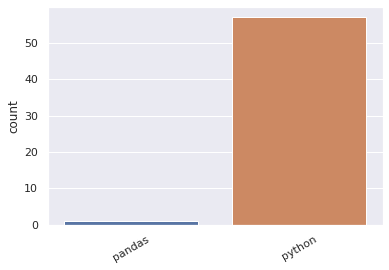

In [19]:
# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['pandas', 'python']

# Plot the bar chart
ax = sns.barplot(x=cd, y=[pandas, python])
ax.set(ylabel="count") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()